## Tugas Besar 1 
### MK Visualisasi Data Gasal 2020/2021

<b>Nama<b>: Abi Rafdhi Hernandy <br> 
<b>NIM<b>: 1301170772

#### Aturan umum:
1. Setiap soal dievaluasi berdasarkan _code program_ dan penjelasan yang dibuat.
2. File _midterm project_ yang telah dikerjakan harus di-submit melalui LMS.
3. Batas akhir submit file adalah 1 November 2020 pukul 21:00.
4. <b><font color='red'>Setiap tindakan plagiarism akan berakibat pada ketidaklulusan pada MK ini.</font><b>

### Kasus 1: Pima Indian Diabetes Data Set (Soal 1 - 2)
Dataset ini berasal dari the National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari pengumpulan dataset ini untuk dapat memprediksi secara diagnosis apakah seseorang mengidap penyakit diabetes atau tidak berdasarkan beberapa pengukuran diagnostik. Seluruh pasien pada dataset ini adalah perempuan keturunan India Pima yang berumur kurang dari 21 tahun.<br><br>
Dataset terdiri dari beberapa variabel prediktor medis dan satu variabel target sebagai _outcome_. Variabel prediktor di antaranya jumlah kehamilan, BMI, level insulin, usia, dll.lin level, age, and so on. Dataset dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/3i3gfr8pih4jwd4/diabetes.csv?dl=0)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from scipy.stats import stats

### Soal 1 (15 poin)
Tampilkan visualisasi distribusi data untuk variabel "Glucose" dan "Insulin", lalu jelaskan hasil distribusinya.

#### Code

In [63]:
# Read Dataset Diabetes
Diabetes_df = pd.read_csv('diabetes.csv')
Diabetes_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
Diabetes_df = Diabetes_df.round(2)
Diabetes_df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0


In [65]:
Diabetes_df.shape

(768, 9)

In [66]:
Diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
Diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [68]:
Diabetes_df.iloc[-90:].describe().astype(int)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,90,90,90,90,90,90,90,90,90
mean,3,124,70,20,81,32,0,33,0
std,3,28,18,15,114,8,0,11,0
min,0,56,0,0,0,0,0,21,0
25%,1,102,62,0,0,28,0,24,0
50%,3,121,74,24,0,32,0,29,0
75%,6,140,80,32,136,37,0,42,1
max,13,190,114,49,510,49,1,69,1


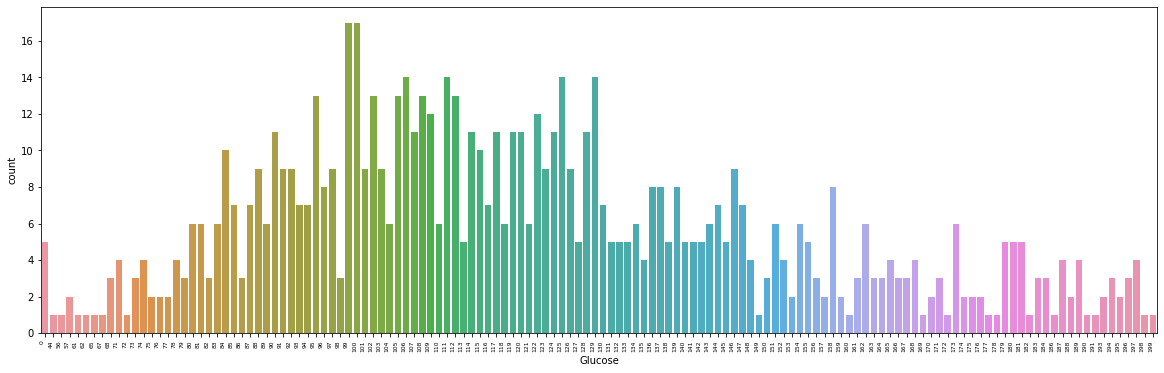

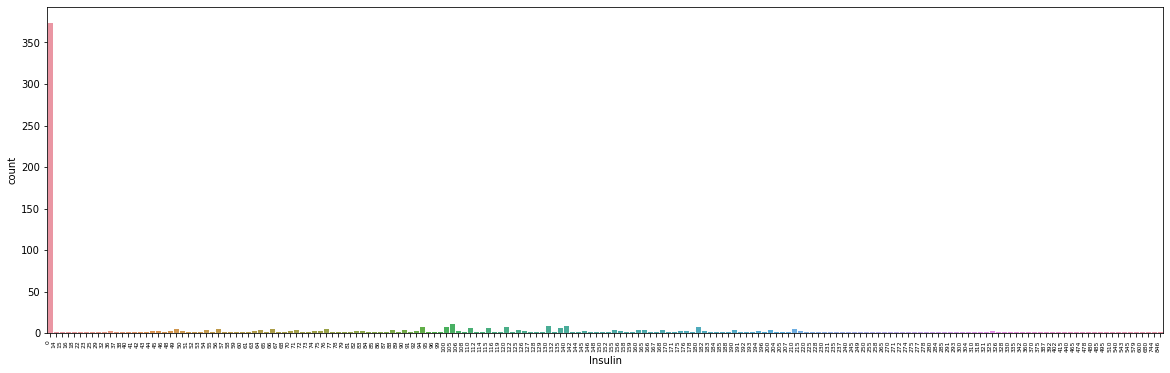

In [69]:
categori = ['Glucose','Insulin']
for i in categori:
  plt.figure(figsize=(20,6))
  ax = sns.countplot(x=i,data=Diabetes_df);
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

#### Penjelasan

1. Pertama, pada grafik data Glucose, bentuk grafik sudah cukup simetris sehingga hal ini menunjukan bahwa distribusi data pada variabel Glucose sudah bagus. Dilihat juga karena persebaran data pada variabel Glucose lumayan banyak, ada kemungkinan variabel glucose ini memiliki korelasi yang cukup kuat terhadapt variabel keluaran.

2. Kedua, pada grafik Insulin, terlihat bahwa data pada insulin yang bernilai 0, dan juga ada sedikitnya data pada insulin yang terdistribusi, ini juga berhubungan dengan korelasi dimana variabel insulin dengan data yang sedikit mungkin tidak berkorelasi terlalu kuat dengan variabel keluaran.

### Soal 2 (25 poin)
Tampilkan visualisasi dari korelasi (i) antar variabel dan (ii) antara variabel dan target, lalu jelaskan hasil korelasinya.

#### Code

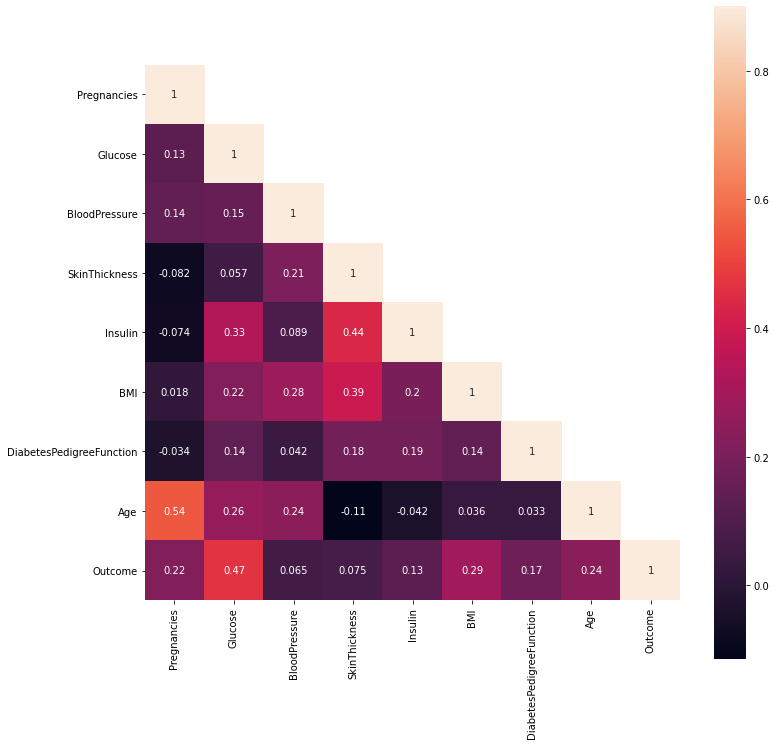

In [70]:
#Korelasi Antar Variabel (i)

corr = Diabetes_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(12,12)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [71]:
#Korelasi Antara Variabel dan Target (ii)

#Correlation with output variable
cor_target = abs(corr["Outcome"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target!=1]
relevant_features

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173288
Age                         0.238356
Name: Outcome, dtype: float64

#### Penjelasan 
(i) Pada korelasi antar variabel (i) saya menggunakan heatmap untuk melihat korelasi antar tiap variabel. Pada grafik heatmap yang ditampilkan terdapat range angka antara 0-1 dan juga ada tanda (+) dan (-) yang merupakan arah hubungan koefisien. Jika koefisien semakin mendekati angka 1 atau -1 maka hubungan antara dua variabel tersebut akan semakin kuat, dan apabila nilai koefisien mendekati angka 0, itu menunjukan hubungan antara dua variabel tersebut akan semakin kecil/lemah. Lalu tanda arah hubungan koefisien bertanda (+) berarti hubungan kedua variabel tersebut positif, artinya jika salah satu dari dua varibael yang behubungan nilainya ditingkatkan, maka nilai variabel satunya lagi akan ikut meningkat. Sebaliknya jika nilai koefisien bertanda (-) itu menandakan hubungan antara dua variabel tersebut negatif. Artinya jika salah satu dari dua varibael yang behubungan nilainya ditingkatkan, maka variabel satunya lagi nilainya akan menurun.

(ii) Pada korelasi antar variabel dan target (ii) saya menggunakan fitur relevansi. Seperti yang dapat dilihat pada output, hanya variabel Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, yang sangat berkorelasi dengan variabel keluaran "Outcome" dengan variabel Glucose yang memiliki korelasi paling tinggi terhadap variabel keluaran "Outcome"

### Kasus 2: Stock Market Analysis (Soal 3 - 4)
Pada kasus ini, kita akan membandingkan beberapa parameter yang diturunkan dari data historis harga saham dari 3 perusahaan, yaitu Nasdaq, Nikkei dan Hang Seng. Data set dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/0wny6x5sio9nvap/stock_market.zip?dl=0).

### Soal 3 (30 poin)
Lakukanlah _trend analysis_ nilai _daily percentage change_ dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan melalui visualisasi data.
_Trend analysis_ dilakukan dengan menggunakan hubungan berikut:
![output%2011.png](https://www.dl.dropboxusercontent.com/s/dxmrm74ksz5l9v2/trend_analysis_fig.png?dl=0)

#### Code

In [72]:
#NASDAQ
#Read Dataaset Nasdaq
Nasdaq_df = pd.read_csv('Nasdaq.csv')
Nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,7530.160156,7582.890137,7428.299805,7449.029785,7449.029785,2532220000
1,2018-10-22,7486.740234,7520.540039,7424.740234,7468.629883,7468.629883,2282400000
2,2018-10-23,7328.549805,7472.580078,7260.129883,7437.540039,7437.540039,2735820000
3,2018-10-24,7423.209961,7435.689941,7099.000000,7108.399902,7108.399902,2935550000
4,2018-10-25,7197.490234,7364.819824,7178.540039,7318.339844,7318.339844,2741810000


In [73]:
Nasdaq_df = Nasdaq_df.round(2)
Nasdaq_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,7530.16,7582.89,7428.30,7449.03,7449.03,2532220000
1,2018-10-22,7486.74,7520.54,7424.74,7468.63,7468.63,2282400000


In [74]:
Nasdaq_df.shape

(502, 7)

In [75]:
Nasdaq_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [76]:
Nasdaq_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [77]:
Nasdaq_df['Date'] = pd.to_datetime(Nasdaq_df['Date'])
Nasdaq_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,7530.16,7582.89,7428.30,7449.03,7449.03,2532220000
1,2018-10-22,7486.74,7520.54,7424.74,7468.63,7468.63,2282400000


In [78]:
type(Nasdaq_df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [79]:
Nasdaq_df['Date'].max() - Nasdaq_df['Date'].min()

Timedelta('728 days 00:00:00')

In [80]:
Nasdaq_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,10840,10930,10733,10841,10841,4093863777
std,591,585,597,591,591,672381737
min,9426,9756,9403,9492,9492,2997810000
25%,10445,10525,10371,10477,10477,3608095000
50%,10921,10984,10807,10911,10911,4008355000
75%,11220,11295,11119,11205,11205,4329237500
max,12047,12074,11836,12056,12056,7279230000


In [81]:
Nasdaq_df['Day_Perc_Change'] = Nasdaq_df['Adj Close'].pct_change()*100
Nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
0,2018-10-19,7530.16,7582.89,7428.30,7449.03,7449.03,2532220000,NaN
1,2018-10-22,7486.74,7520.54,7424.74,7468.63,7468.63,2282400000,0.263122
2,2018-10-23,7328.55,7472.58,7260.13,7437.54,7437.54,2735820000,-0.416274
3,2018-10-24,7423.21,7435.69,7099.00,7108.40,7108.40,2935550000,-4.425388
4,2018-10-25,7197.49,7364.82,7178.54,7318.34,7318.34,2741810000,2.953407


In [82]:
Nasdaq_df.dropna(inplace = True, axis = 0)
Nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
1,2018-10-22,7486.74,7520.54,7424.74,7468.63,7468.63,2282400000,0.263122
2,2018-10-23,7328.55,7472.58,7260.13,7437.54,7437.54,2735820000,-0.416274
3,2018-10-24,7423.21,7435.69,7099.00,7108.40,7108.40,2935550000,-4.425388
4,2018-10-25,7197.49,7364.82,7178.54,7318.34,7318.34,2741810000,2.953407
5,2018-10-26,7125.18,7283.32,7057.00,7167.21,7167.21,2964780000,-2.065086


In [83]:
def trend(x):
  if x  > -0.5 and x <= 0.5:
    return 'Slight or No Change'
  elif x  > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x  > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x  > 1 and x <= 3:
    return 'Positive'
  elif x  > -3 and x <= -1:
    return 'Negative'
  elif x  > 3 and x <= 7:
    return 'Among Top Gainers'
  elif x  > -7 and x <= -3:
    return 'Among Top Losers'
  elif x  > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'

Nasdaq_df["Trend"]= np.zeros(Nasdaq_df["Day_Perc_Change"].count())
Nasdaq_df['Trend']= Nasdaq_df['Day_Perc_Change'].apply(lambda x:trend(x))
Nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
1,2018-10-22,7486.74,7520.54,7424.74,7468.63,7468.63,2282400000,0.263122,Slight or No Change
2,2018-10-23,7328.55,7472.58,7260.13,7437.54,7437.54,2735820000,-0.416274,Slight or No Change
3,2018-10-24,7423.21,7435.69,7099.00,7108.40,7108.40,2935550000,-4.425388,Among Top Losers
4,2018-10-25,7197.49,7364.82,7178.54,7318.34,7318.34,2741810000,2.953407,Positive
5,2018-10-26,7125.18,7283.32,7057.00,7167.21,7167.21,2964780000,-2.065086,Negative


In [84]:
start_date = "2019-1-1"
end_date = "2019-12-31"

after_start_date = Nasdaq_df["Date"] >= start_date
before_end_date = Nasdaq_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = Nasdaq_df.loc[between_two_dates]

print(filtered_dates)

          Date     Open  ...  Day_Perc_Change                Trend
49  2019-01-02  6506.91  ...         0.462075  Slight or No Change
50  2019-01-03  6584.77  ...        -3.036931     Among Top Losers
51  2019-01-04  6567.14  ...         4.260231    Among Top Gainers
52  2019-01-07  6757.53  ...         1.255554             Positive
53  2019-01-08  6893.44  ...         1.077604             Positive
..         ...      ...  ...              ...                  ...
296 2019-12-24  8955.01  ...         0.080821  Slight or No Change
297 2019-12-26  8970.21  ...         0.776398      Slight Positive
298 2019-12-27  9049.47  ...        -0.174787  Slight or No Change
299 2019-12-30  9004.45  ...        -0.673172      Slight Negative
300 2019-12-31  8918.74  ...         0.297452  Slight or No Change

[252 rows x 9 columns]


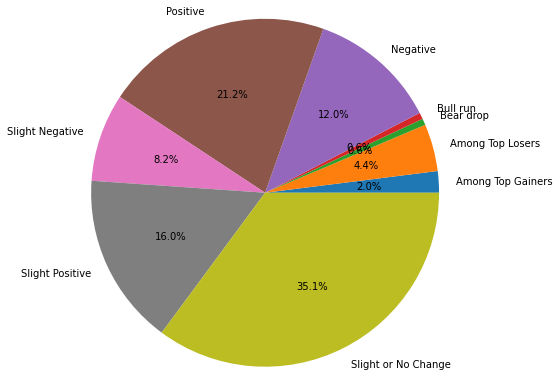

In [85]:
Nasdaq_pie_data = Nasdaq_df.groupby('Trend')
pie_label = sorted([i for i in Nasdaq_df.loc[:, 'Trend'].unique()])
plt.pie(Nasdaq_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

In [86]:
#NIKKEI
#Read Datasaet Nikkei
Nikkei_df = pd.read_csv('Nikkei.csv')
Nikkei_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,22342.000000,22551.669922,22212.570313,22532.080078,22532.080078,67400.0
1,2018-10-22,22374.210938,22672.250000,22271.589844,22614.820313,22614.820313,63000.0
2,2018-10-23,22404.140625,22410.150391,21993.070313,22010.779297,22010.779297,80200.0
3,2018-10-24,22167.759766,22207.089844,21911.419922,22091.179688,22091.179688,83900.0
4,2018-10-25,21676.830078,21703.210938,21204.400391,21268.730469,21268.730469,93600.0


In [87]:
Nikkei_df = Nikkei_df.round(2)
Nikkei_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,22342.00,22551.67,22212.57,22532.08,22532.08,67400.0
1,2018-10-22,22374.21,22672.25,22271.59,22614.82,22614.82,63000.0


In [88]:
Nikkei_df.shape

(486, 7)

In [89]:
Nikkei_df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [90]:
Nikkei_df.dropna(inplace = True, axis = 0)

In [91]:
Nikkei_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [92]:
Nikkei_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [93]:
Nikkei_df['Date'] = pd.to_datetime(Nikkei_df['Date'])
Nikkei_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,22342.00,22551.67,22212.57,22532.08,22532.08,67400.0
1,2018-10-22,22374.21,22672.25,22271.59,22614.82,22614.82,63000.0


In [94]:
type(Nikkei_df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
Nikkei_df['Date'].max() - Nikkei_df['Date'].min()

Timedelta('731 days 00:00:00')

In [96]:
Nikkei_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,22906,23016,22787,22903,22903,66762
std,457,433,498,482,482,20126
min,21912,22214,21529,21530,21530,0
25%,22498,22633,22369,22518,22518,56150
50%,22982,23103,22870,22965,22965,66000
75%,23260,23374,23183,23290,23290,77600
max,23713,23725,23552,23671,23671,120500


In [97]:
Nikkei_df['Day_Perc_Change'] = Nikkei_df['Adj Close'].pct_change()*100
Nikkei_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
0,2018-10-19,22342.00,22551.67,22212.57,22532.08,22532.08,67400.0,NaN
1,2018-10-22,22374.21,22672.25,22271.59,22614.82,22614.82,63000.0,0.367210
2,2018-10-23,22404.14,22410.15,21993.07,22010.78,22010.78,80200.0,-2.670992
3,2018-10-24,22167.76,22207.09,21911.42,22091.18,22091.18,83900.0,0.365276
4,2018-10-25,21676.83,21703.21,21204.40,21268.73,21268.73,93600.0,-3.722979


In [98]:
Nikkei_df.dropna(inplace = True, axis = 0)
Nikkei_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
1,2018-10-22,22374.21,22672.25,22271.59,22614.82,22614.82,63000.0,0.367210
2,2018-10-23,22404.14,22410.15,21993.07,22010.78,22010.78,80200.0,-2.670992
3,2018-10-24,22167.76,22207.09,21911.42,22091.18,22091.18,83900.0,0.365276
4,2018-10-25,21676.83,21703.21,21204.40,21268.73,21268.73,93600.0,-3.722979
5,2018-10-26,21440.84,21476.66,20971.93,21184.60,21184.60,92900.0,-0.395557


In [99]:
Nikkei_df['Trend']= np.zeros(Nikkei_df["Day_Perc_Change"].count())
Nikkei_df['Trend']= Nikkei_df['Day_Perc_Change'].apply(lambda x:trend(x))
Nikkei_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
1,2018-10-22,22374.21,22672.25,22271.59,22614.82,22614.82,63000.0,0.367210,Slight or No Change
2,2018-10-23,22404.14,22410.15,21993.07,22010.78,22010.78,80200.0,-2.670992,Negative
3,2018-10-24,22167.76,22207.09,21911.42,22091.18,22091.18,83900.0,0.365276,Slight or No Change
4,2018-10-25,21676.83,21703.21,21204.40,21268.73,21268.73,93600.0,-3.722979,Among Top Losers
5,2018-10-26,21440.84,21476.66,20971.93,21184.60,21184.60,92900.0,-0.395557,Slight or No Change


In [100]:
start_date = "2019-1-1"
end_date = "2019-12-31"

after_start_date = Nikkei_df["Date"] >= start_date
before_end_date = Nikkei_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = Nikkei_df.loc[between_two_dates]

print(filtered_dates)

          Date      Open  ...  Day_Perc_Change                Trend
52  2019-01-04  19655.13  ...        -2.262379             Negative
53  2019-01-07  19944.61  ...         2.438457             Positive
54  2019-01-08  20224.67  ...         0.823745      Slight Positive
55  2019-01-09  20366.30  ...         1.103839             Positive
56  2019-01-10  20270.88  ...        -1.288781             Negative
..         ...       ...  ...              ...                  ...
288 2019-12-24  23839.18  ...         0.039755  Slight or No Change
289 2019-12-25  23813.59  ...        -0.200205  Slight or No Change
290 2019-12-26  23787.70  ...         0.597279      Slight Positive
291 2019-12-27  23953.75  ...        -0.364474  Slight or No Change
292 2019-12-30  23770.93  ...        -0.759720      Slight Negative

[241 rows x 9 columns]


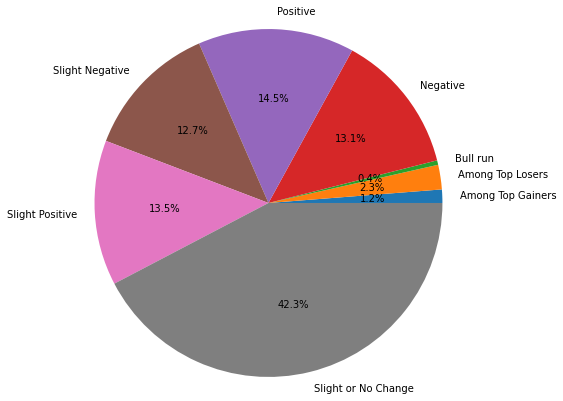

In [101]:
Nikkei_pie_data = Nikkei_df.groupby('Trend')
pie_label = sorted([i for i in Nikkei_df.loc[:, 'Trend'].unique()])
plt.pie(Nikkei_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

In [102]:
#Hangseng
#Read Dataset Hang_Seng
HangSeng_df = pd.read_csv('Hang_Seng.csv')
HangSeng_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,25172.029297,25743.449219,25090.300781,25561.400391,25561.400391,2.037872e+09
1,2018-10-22,25668.330078,26234.859375,25668.330078,26153.150391,26153.150391,2.222812e+09
2,2018-10-23,26015.490234,26015.490234,25315.759766,25346.550781,25346.550781,1.772912e+09
3,2018-10-24,25401.169922,25653.359375,25194.289063,25249.779297,25249.779297,1.962754e+09
4,2018-10-25,24766.720703,24994.460938,24653.789063,24994.460938,24994.460938,2.288634e+09


In [103]:
HangSeng_df = HangSeng_df.round(2)
HangSeng_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,25172.03,25743.45,25090.30,25561.40,25561.40,2.037872e+09
1,2018-10-22,25668.33,26234.86,25668.33,26153.15,26153.15,2.222812e+09


In [104]:
HangSeng_df.shape

(493, 7)

In [105]:
HangSeng_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [106]:
HangSeng_df.dropna(inplace = True, axis = 0)

In [107]:
HangSeng_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [108]:
HangSeng_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [109]:
HangSeng_df['Date'] = pd.to_datetime(HangSeng_df['Date'])
HangSeng_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,25172.03,25743.45,25090.30,25561.40,25561.40,2.037872e+09
1,2018-10-22,25668.33,26234.86,25668.33,26153.15,26153.15,2.222812e+09


In [110]:
type(HangSeng_df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [111]:
HangSeng_df['Date'].max() - HangSeng_df['Date'].min()

Timedelta('728 days 00:00:00')

In [112]:
HangSeng_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,24819,24973,24586,24762,24762,1847891047
std,652,662,621,642,642,635710242
min,23284,23495,23124,23235,23235,0
25%,24382,24572,24200,24434,24434,1459246075
50%,24816,24957,24581,24729,24729,1750760150
75%,25232,25359,25034,25178,25178,2097051475
max,26571,26782,26016,26339,26339,4883381900


In [113]:
HangSeng_df['Day_Perc_Change'] = HangSeng_df['Adj Close'].pct_change()*100
HangSeng_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
0,2018-10-19,25172.03,25743.45,25090.30,25561.40,25561.40,2.037872e+09,NaN
1,2018-10-22,25668.33,26234.86,25668.33,26153.15,26153.15,2.222812e+09,2.315014
2,2018-10-23,26015.49,26015.49,25315.76,25346.55,25346.55,1.772912e+09,-3.084141
3,2018-10-24,25401.17,25653.36,25194.29,25249.78,25249.78,1.962754e+09,-0.381788
4,2018-10-25,24766.72,24994.46,24653.79,24994.46,24994.46,2.288634e+09,-1.011177


In [114]:
HangSeng_df.dropna(inplace = True, axis = 0)
HangSeng_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
1,2018-10-22,25668.33,26234.86,25668.33,26153.15,26153.15,2.222812e+09,2.315014
2,2018-10-23,26015.49,26015.49,25315.76,25346.55,25346.55,1.772912e+09,-3.084141
3,2018-10-24,25401.17,25653.36,25194.29,25249.78,25249.78,1.962754e+09,-0.381788
4,2018-10-25,24766.72,24994.46,24653.79,24994.46,24994.46,2.288634e+09,-1.011177
5,2018-10-26,25031.49,25062.20,24589.04,24717.63,24717.63,1.688396e+09,-1.107565


In [115]:
HangSeng_df['Trend']= np.zeros(HangSeng_df["Day_Perc_Change"].count())
HangSeng_df['Trend']= HangSeng_df['Day_Perc_Change'].apply(lambda x:trend(x))
HangSeng_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
1,2018-10-22,25668.33,26234.86,25668.33,26153.15,26153.15,2.222812e+09,2.315014,Positive
2,2018-10-23,26015.49,26015.49,25315.76,25346.55,25346.55,1.772912e+09,-3.084141,Among Top Losers
3,2018-10-24,25401.17,25653.36,25194.29,25249.78,25249.78,1.962754e+09,-0.381788,Slight or No Change
4,2018-10-25,24766.72,24994.46,24653.79,24994.46,24994.46,2.288634e+09,-1.011177,Negative
5,2018-10-26,25031.49,25062.20,24589.04,24717.63,24717.63,1.688396e+09,-1.107565,Negative


In [116]:
start_date = "2019-1-1"
end_date = "2019-12-31"

after_start_date = HangSeng_df["Date"] >= start_date
before_end_date = HangSeng_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = HangSeng_df.loc[between_two_dates]

print(filtered_dates)

          Date      Open  ...  Day_Perc_Change                Trend
50  2019-01-02  25824.44  ...        -2.767772             Negative
51  2019-01-03  25077.68  ...        -0.262591  Slight or No Change
52  2019-01-04  24946.12  ...         2.240911             Positive
53  2019-01-07  26015.84  ...         0.818192      Slight Positive
54  2019-01-08  25852.50  ...         0.153857  Slight or No Change
..         ...       ...  ...              ...                  ...
291 2019-12-23  28024.62  ...         0.125792  Slight or No Change
292 2019-12-24  27901.51  ...        -0.151220  Slight or No Change
293 2019-12-27  28033.66  ...         1.296322             Positive
294 2019-12-30  28250.48  ...         0.332927  Slight or No Change
295 2019-12-31  28241.43  ...        -0.457778  Slight or No Change

[246 rows x 9 columns]


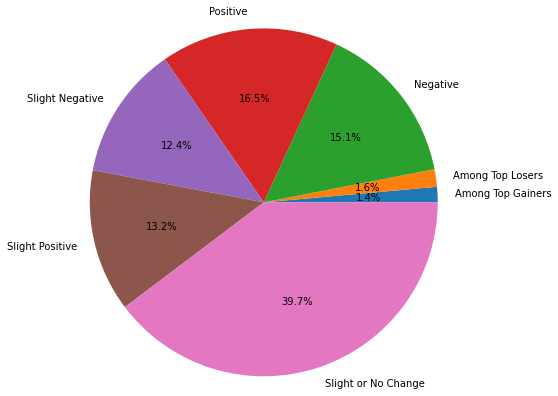

In [117]:
HangSeng_pie_data = HangSeng_df.groupby('Trend')
pie_label = sorted([i for i in HangSeng_df.loc[:, 'Trend'].unique()])
plt.pie(HangSeng_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

#### Penjelasan 
1. Pada Pie Chart Nasdaq, Nikkei, dan HangSeng, terlihat dari pie chart ketiganya presentase paling besar ada pada "Slight or No Change" yang artinya perubahan harga saham dari tahun ke tahun tidak berubah secara signifikan dan jika perubahannya kecil, potensi keuntungannya pun kecil.

2. Dari ketiga pie hart diatas juga dapat dilihat daerah dari "Among Top Losers" dan "Among Top Gainers" memiliki presentasae yang sangat kecil, karena presentasae yang kecil pada "Amont Top Losers" maupunu "Among Top Gainers" maka peluang untuk meningkatkan atau menurunkan perubahan harga saham juga sangat kecil. 

3. Pada pie chart Nasdaq terdapat Bull run (0,6%) dan Bear drop(0,5%) menunjukan bahwa kondisi saham Nasdaq sedang mengalami penguatan sebesar 0,6% dan pelemahan sebesar 0,5%

4. Pada Pie Chart Nikkei terdapat Bull run (0,4%) yang menunjukan bahwa kondisi saham Nikkei sedang mengalami penguatan sebesar 0,4%

5. Pada pie chart HangSeng tidak terdapat Bull run maupun Bear drop yang menunjukan bahwwa tidak ada perubahan harga saham yang signifikan pada saham HangSeng.  

### Soal 4 (30 poin)
Lakukanlah analisis volatilitas dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan hasil visualisasinya.

#### Code

In [118]:
combined_df = pd.concat([Nasdaq_df["Adj Close"], Nikkei_df["Adj Close"], HangSeng_df["Adj Close"]], axis=1)
combined_df.columns = ["Nasdaq", "Nikkei", "HangSeng"]

In [119]:
combined_df.dropna(inplace=True, axis = 0)
combined_df.head()

,Nasdaq,Nikkei,HangSeng
1,7468.63,22614.82,26153.15
2,7437.54,22010.78,25346.55
3,7108.40,22091.18,25249.78
4,7318.34,21268.73,24994.46
5,7167.21,21184.60,24717.63


In [120]:
combined_df.dropna(inplace = True, axis = 0)
combined_df.head()

,Nasdaq,Nikkei,HangSeng
1,7468.63,22614.82,26153.15
2,7437.54,22010.78,25346.55
3,7108.40,22091.18,25249.78
4,7318.34,21268.73,24994.46
5,7167.21,21184.60,24717.63


In [121]:
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)

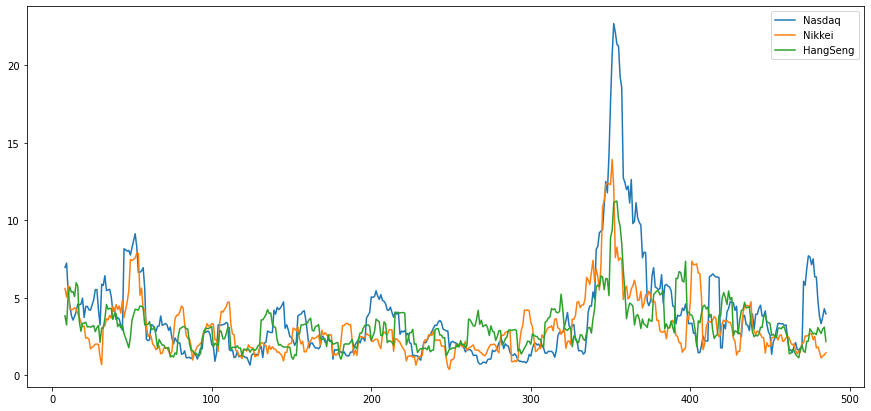

In [122]:
volatility = pct_chg_df[['Nasdaq', 'Nikkei', 'HangSeng']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 7))

#### Penjelasan 
Pada grafik yang ada diatas dapat dilihat bahwa volatilitas saham Nasdaq lebih tinggi dibanging dua saham lainnya, disusul oleh saham Nikkei kemudian saham HangSeng. Tingginya volatilitas pada saham Nasdaq sedikit banyaknya dipengaruhi oleh Bull Run dan Bear Drop yang ada pada saham Nasdaq

Volatilitas yang tinggi pada saham Nasdaq memiliki peluang mendapat keuntungan lebih tinggi. Jika suatu saham tidak bergerak nilai sahamnya atau cenderung memiliki nilai presentase "Slight Or no Change" yang besar cenderung memiliki volatitiltas yang rendah, jika memiliki volatilitas yang rendah kemungkinan potensi keuntungannya juga rendah. Dengan volatilitas yang tinggi saham mungkin berpotensi memiliki keuntungan yang tinggi juga, tetapi juga memiliki resiko yang sangat tinggi. Begitupun saham dengan volatilitas yang rendah, memiliki resiko yang tidak terlalu tinggi.